# 전설의 포켓몬 구하기

- 캐글 데이더셋 (https://www.kaggle.com/datasets/abcsds/pokemon/data)

## 1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [2]:
import os
csv_path = os.getenv("HOME") +"/aiffel/pokemon_eda/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)
print('슝=3')

슝=3


In [3]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [5]:
# Q. 일반 포켓몬의 데이터셋도 만들어봅시다.
ordinary = pokemon[pokemon['Legendary']== False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 2. EDA

### 1) Missing Values

In [6]:
pokemon.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [8]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### 2) ID, Name

In [9]:
# 몇 종류의 #을 가지고 있는지 - 전체데이터가 800개인데 721이라면 중복이 있다는 뜻
# 중복된 데이터를 제외한 데이터의 크기를 구하는 방법
len(set(pokemon['#']))

721

In [10]:
#같은 리자몽에서 시작해서 진화한 애들은 같은 #라는 걸 확인 (6은 예시)
pokemon[pokemon['#'] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [11]:
#유일한 데이터의 갯수를 확인하는 방법은 두가지이다 
#1. pokemon['Name'].nunique()
len(set(pokemon['Name']))

800

### 3) 속성 (Type1, Type 2)

In [12]:
#각 속성의 종류
len(list(set(pokemon['Type 1']))), len(list(set(pokemon['Type 2'])))

(18, 19)

In [13]:
#type 2 가 type 1 보다 많은게 뭔지 보기
set(pokemon['Type 2']) - set(pokemon['Type 1'])

{nan}

In [14]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Fire', 'Water', 'Ground', 'Ghost', 'Psychic', 'Poison', 'Dragon', 'Ice', 'Flying', 'Fairy', 'Fighting', 'Normal', 'Rock', 'Electric', 'Dark', 'Steel', 'Bug', 'Grass']


In [15]:
pokemon["Type 2"].isna().sum()

386

### Type1 데이터 분포

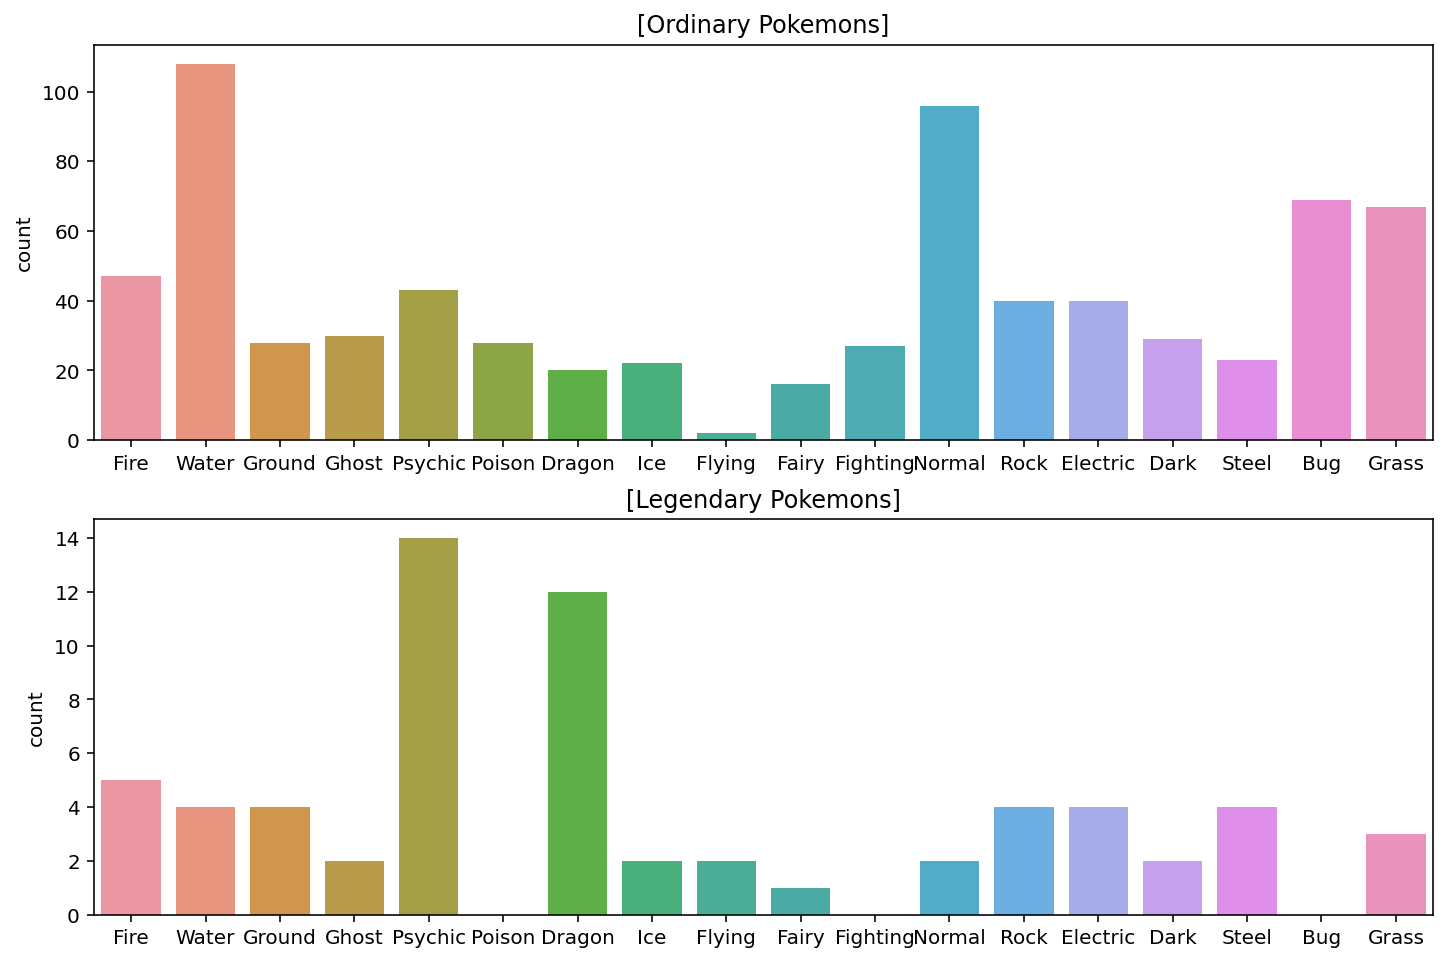

In [16]:
plt.figure(figsize=(12, 8))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

* ordinary에는 water, normal, bug 속성, legendary에는 psychic, dragon속성이 많다

In [17]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


* 속성 1에서는 legendary 포켓몬의 Flying의 속성이 50% 로 가장 높다

### Type 2 데이터 분포

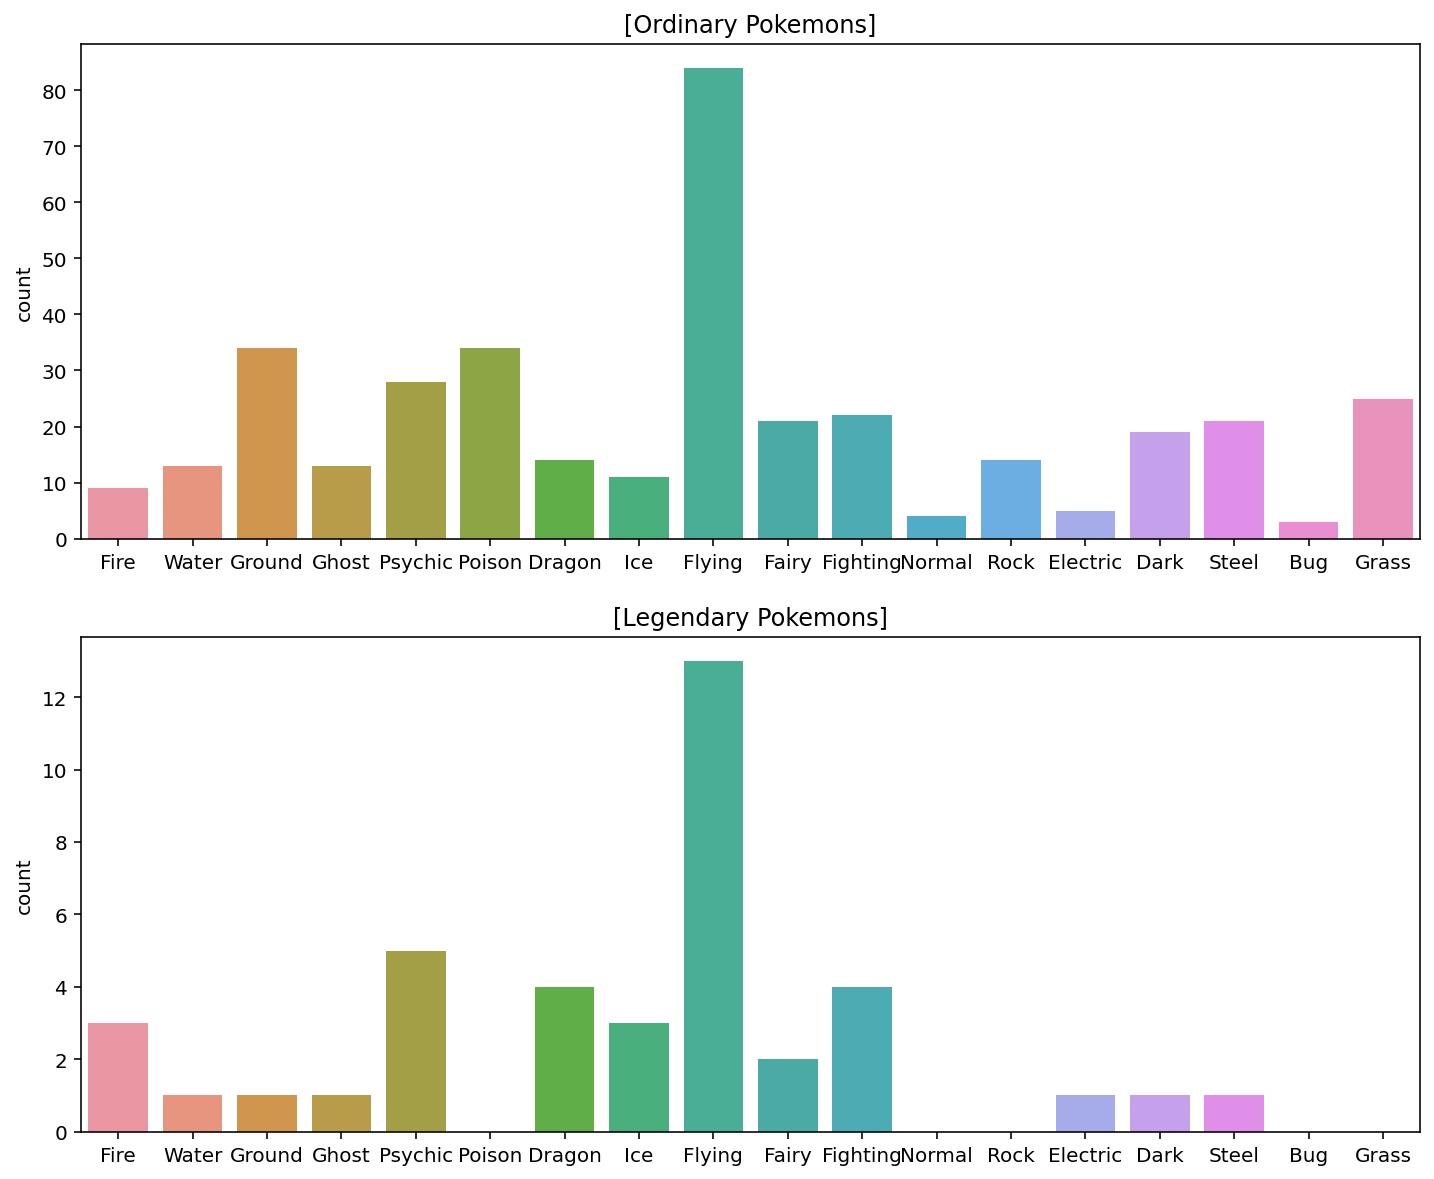

In [18]:
# Q. 아래 코드의 빈칸을 채워주세요.
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x='Type 2', order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x='Type 2', order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

* Flying 이 압도적으로 많다. 기본적으로 두번째 스킬을 가지고 있으면 그건 Flying인 경우가 많다는 뜻

In [19]:
# Q. Type 2에 대해서도 피벗 테이블을 만들어봅시다.
pd.pivot_table(pokemon, index='Type 2', values='Legendary').sort_values(by=['Legendary'], ascending= False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


* 속성 2에서는 legendary 포켓몬의 Fire 속성이 25% 로 가장 높다

### 4) Total

In [20]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

* 얘네들의 합이 진짜로 Total 이 맞는지 검증부터 해본다

In [21]:
#첫번째 포켓몬에 대한 검증
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [22]:
# Q. 'pokemon['Total'].values'와 'pokemon[stats].values의 총합'이 같은 포켓몬의 수를 확인해봅시다.
len(pokemon['Total'].values == pokemon[stats].values.sum(axis=1))

800

* 전부 다 total이랑 일치한다.

### Total 값에 따른 분포 plot

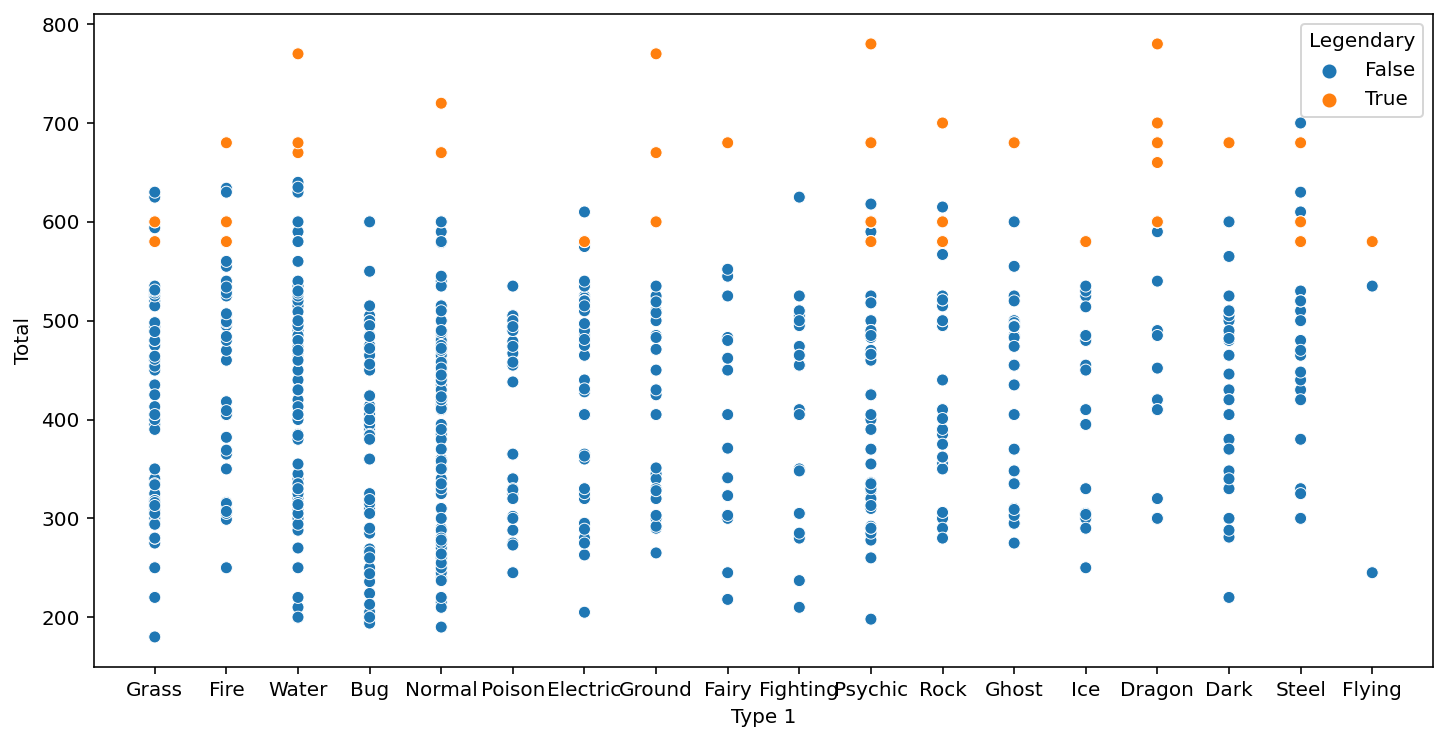

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

sns.scatterplot(data=pokemon, x='Type 1', y='Total', hue='Legendary')
plt.show()

* legendary 포켓몬의 Type 에 따라 봤을 때, 더 Stat total 이 높다는 걸 알 수 있다

### 5) 세부 stats

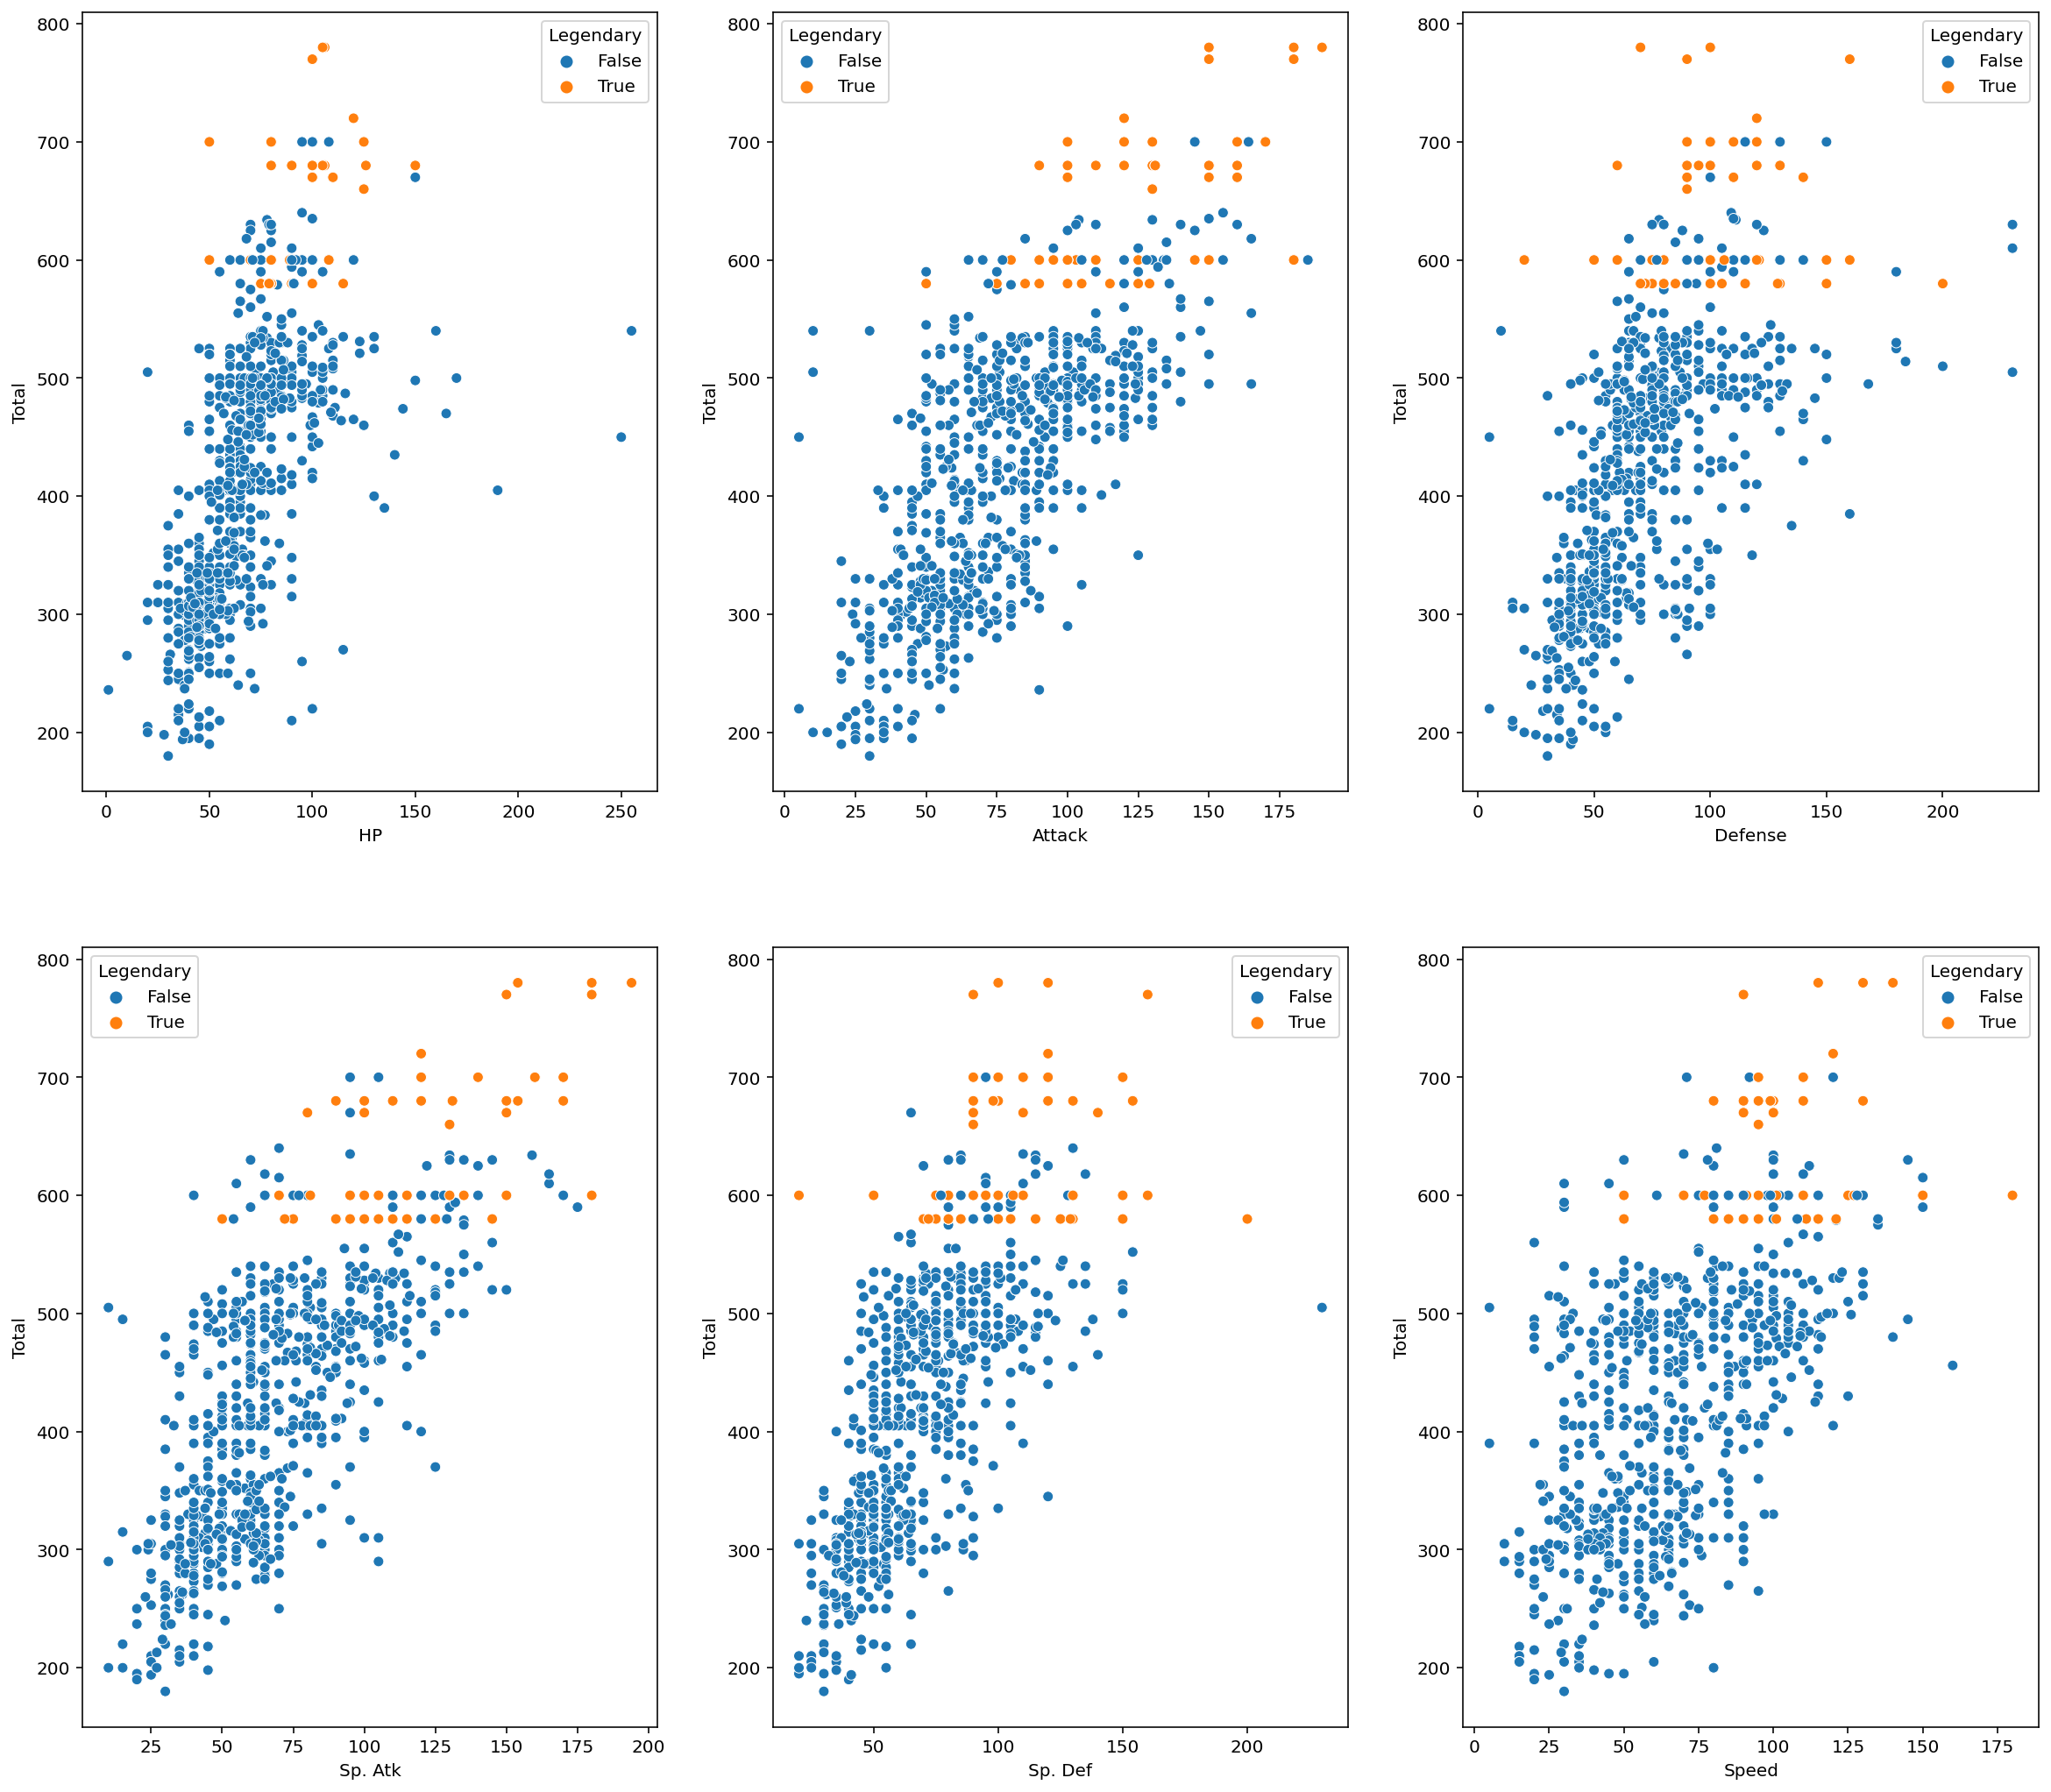

In [24]:
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현합니다.

fig, axes = plt.subplots(2,3)
fig.set_size_inches(20, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y='Total', x="HP", hue="Legendary", ax=axes[0,0])

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y='Total', x='Attack', hue='Legendary', ax=axes[0,1])

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y='Total', x='Defense', hue='Legendary', ax=axes[0,2])

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y='Total', x='Sp. Atk', hue='Legendary', ax=axes[1,0])

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y='Total', x='Sp. Def', hue='Legendary', ax=axes[1,1])

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y='Total', x='Speed', hue='Legendary', ax=axes[1,2])

plt.show()

### 6) Generation

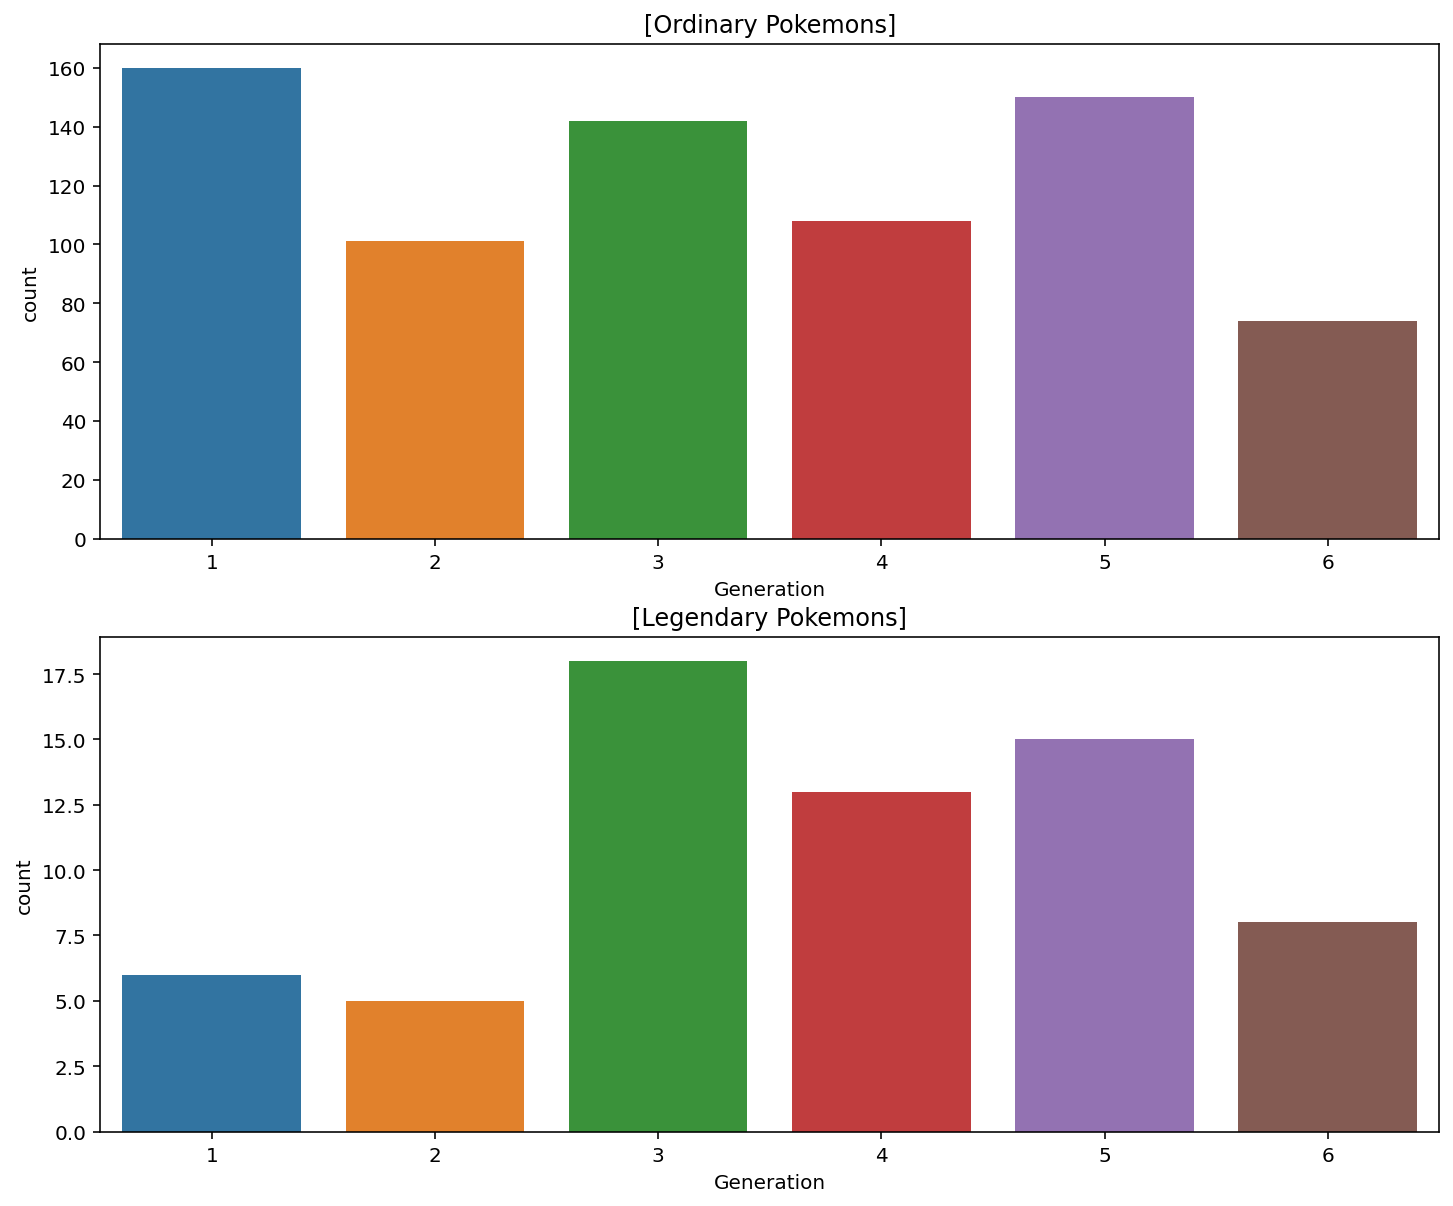

In [25]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation")
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Generation")
plt.title("[Legendary Pokemons]")
plt.show()

## 3. 통계값

### 1) Total

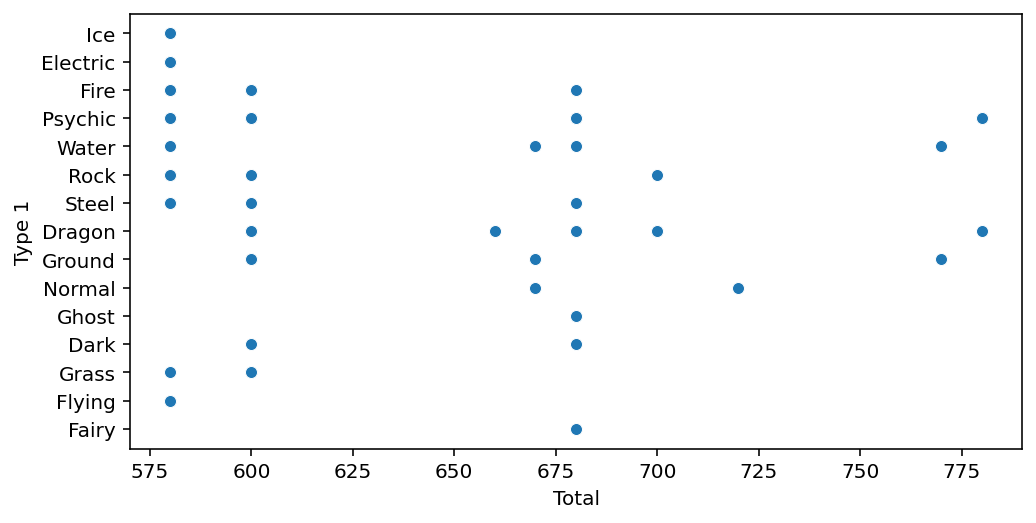

In [26]:
#전설포켓몬의 Total stat 값
plt.figure(figsize=(8,4))

sns.scatterplot(data=legendary, y='Type 1', x='Total')
plt.show()

* 전설포켓몬 전체 스탯이 특정 값에만 몰려있다

In [27]:
legendary["Total"].unique().tolist()

[580, 680, 780, 600, 700, 670, 770, 720, 660]

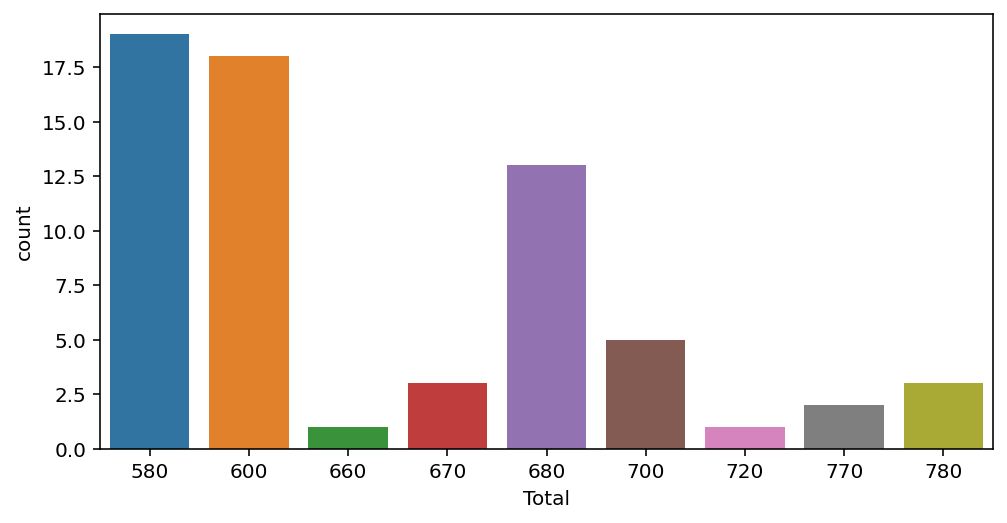

In [28]:
plt.figure(figsize=(8,4))

sns.countplot(data=legendary, x='Total')
plt.show()

In [29]:
round(65/9, 2)

7.22

* 전체 65마리의 전설포켓몬 중 9개의 total값만 가진다는 건, 약 7.22마리가 같은 total stat을 가진다는 말

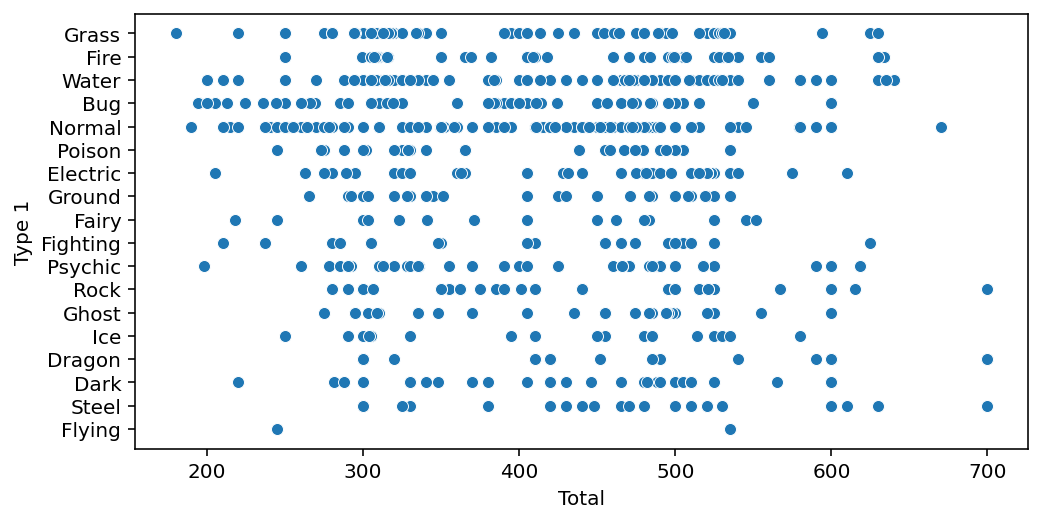

In [30]:
#ordinary 의 경우
plt.figure(figsize=(8,4))

sns.scatterplot(data=ordinary, y='Type 1', x='Total')
plt.show()

In [31]:
print(sorted(list(set(ordinary['Total']))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [32]:
len((sorted(list(set(ordinary["Total"])))))

195

In [33]:
round(735/195, 2)

3.77

* 전설포켓몬만 갖고 있는 total값이 있다 (680, 780, 770, 720, 660)

### 2) 이름

In [34]:
legendary

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
61,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
62,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
63,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### 특정 단어가 공통적으로 들어가는 이름

In [35]:
##특정 단어가 들어가있는 이름이 있는가  (노드에서 주어진 코드)
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


### 💡근데 위 방법은 그냥 좀 노가다가 아닌가 싶고 비효율적이다.  
아까 "#"이 같은 애들은, 같은 본체에서 진화한 거였으니까, 그걸 이용해보자.  
보니까 노드에서 준 코드의 데이터 결과값은 오히려 "#"값 487, 492, 719, 720등 빠져있는 걸 발견하였다! ...ㅇ_ㅇ???

In [36]:
names = legendary[legendary.duplicated('#', keep=False)].reset_index(drop=True)
names

#여기서 keep 매개변수는 중복된 행을 유지할지 여부를 지정한다 
# keep='first': 첫 번째 중복 행을 유지하고 나머지 중복 행을 제거합니다.
# keep='last': 마지막 중복 행을 유지하고 나머지 중복 행을 제거합니다.
# keep=False: 모든 중복 행을 유지하고 모든 중복이 발생한 행을 선택합니다.

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


### 💡 특정 문자 들어간 열 찾는 방법
노드에서 주어진 코드는 그냥 노가다(?)인데 조금 변형해서 더 스마트하게 풀어보려고 시도해봤다 (contains 함수)

In [37]:
# formes
# formes = names[13:23] (주어진 코드)

formes = names[names['Name'].str.contains('Forme')]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True
18,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True
19,492,ShayminLand Forme,Grass,NaN,600,100,100,100,100,100,100,4,True
20,492,ShayminSky Forme,Grass,Flying,600,100,103,75,120,75,127,4,True
21,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
22,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True


* 이름에 forme가 들어가면 전설포켓몬일 확률이 아주 높을 것

### 이름 길이

In [38]:
legendary['Name_count'] = legendary['Name'].apply(lambda i: len(i))    
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [39]:
# Q. ordinary 포켓몬의 데이터에도 'name_count' 값을 추가해줍시다.
ordinary['Name_count'] = ordinary['Name'].apply(lambda i:len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


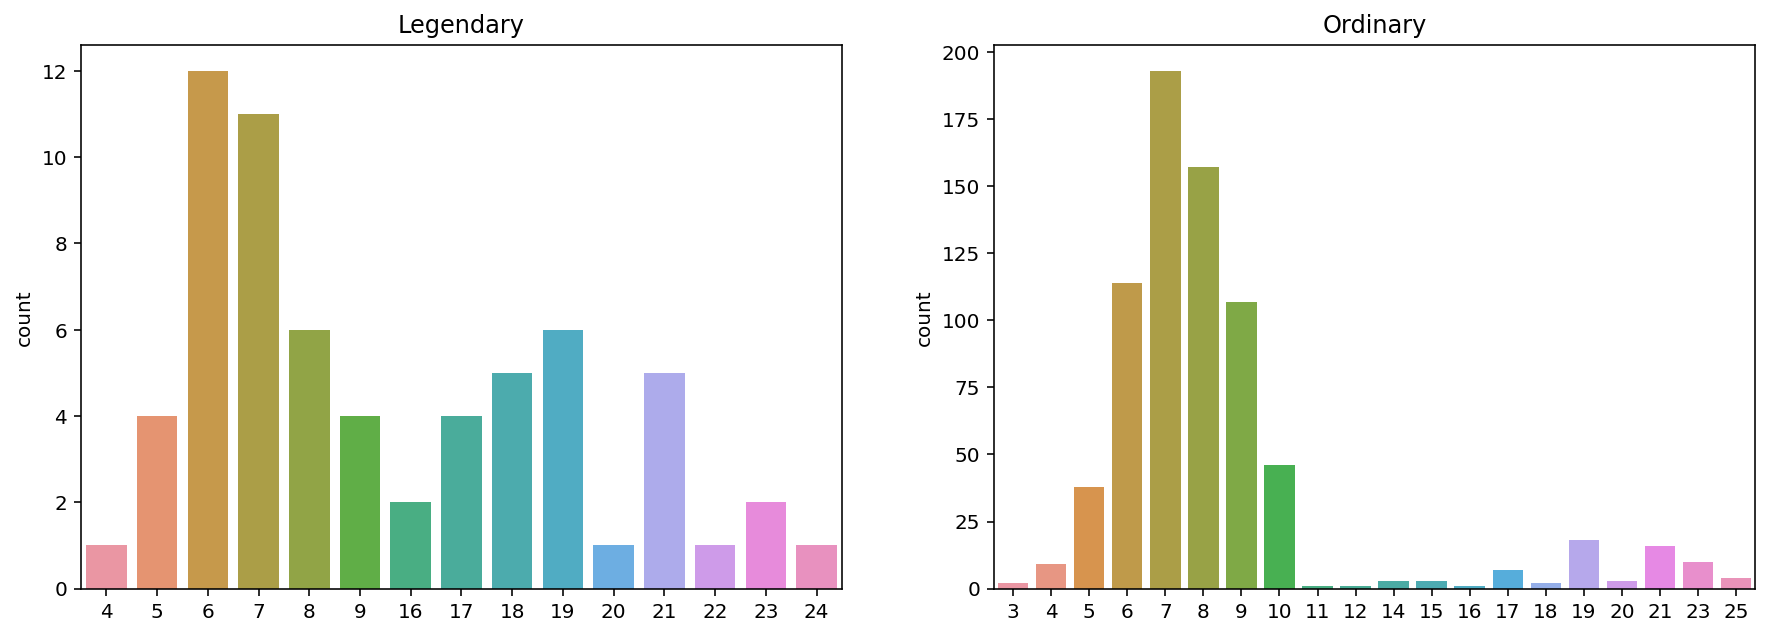

In [40]:
#name_count 컬럼의 특징

plt.figure(figsize=(15, 5))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(121)
sns.countplot(data=legendary, x="Name_count").set_xlabel('')
plt.title("Legendary")

plt.subplot(122)
sns.countplot(data=ordinary, x="Name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

* 전설포켓몬은 16자 이상 이름 길이도 많은데, 일반포켓몬은 10자 이상 넘어가는 애들이 거의 없다

In [41]:
#전설포켓몬 이름이 10자를 넘어갈 확률
print(round(len(legendary[legendary['Name_count'] > 9])/ len(legendary) * 100, 2), '%')

41.54 %


In [42]:
#일반포켓몬 이름이 10자를 넘어갈 확률
print(round(len(ordinary[ordinary['Name_count'] > 9]) / len(ordinary) * 100, 2), '%')

15.65 %


## 4. 데이터 전처리

- 지금까지 중요한 지표를 정리해보자
1. 이름의 길이 (10자 넘는지)
2. Type
3. 특정 Total stat
4. 이름에 Forme가 들어가는지

### 1) 이름의 길이

In [43]:
pokemon['Name_count'] = pokemon['Name'].apply(lambda i:len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [44]:
 #새로운 컬럼 생성하기 (이름길이가 10 이상이면 True)
pokemon['Long_name'] = pokemon['Name_count'] > 9
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_count,Long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


### 2) 이름에 자주 쓰이는 단어 (토큰)

* 어떤 문자열이 알파벳으로만 이루어져 있는지를 확인하고 싶을 때는 isalpha() 함수를 사용 (주의할 점은 이름에 띄어쓰기가 있는 경우에 False로 처리된다)

In [45]:
#따라서, 띄어쓰기 없는 칼럼을 따로 만들어주도록 한다
pokemon['Name_nospace'] = pokemon['Name'].apply(lambda i : i.replace(" ",""))
pokemon.head()                                                                    

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_count,Long_name,Name_nospace
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander


In [46]:
#isalpha로 이름이 알파벳으로만 이뤄져있는지 확인!
pokemon['Name_isalpha'] = pokemon['Name_nospace'].apply(lambda i : i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_count,Long_name,Name_nospace,Name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [47]:
#문자가 아닌 게 포함된 항목을 확인해본다
print(pokemon[pokemon['Name_isalpha'] ==False].shape)
pokemon[pokemon['Name_isalpha'] ==False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_count,Long_name,Name_nospace,Name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


### 💡얘네는 이름이 좀 이상하게 돼있으니까, 바꿔준다. 
여기서도 replace 문법을 줄줄이 쓰지 않고, 한 줄로 더 깔끔하게 쓰려고 시도했다.

In [48]:
#주어진 코드는 또... 너무 길어서 한줄로 줄인다. 

pokemon = pokemon.replace(["Nidoran♀", "Nidoran♂", "Farfetch'd", "Mr. Mime", "Porygon2", "Ho-oh", "Mime Jr.", "Porygon-Z", "Zygarde50% Forme"],
                          ["Nidoran X", "Nidoran Y", "Farfetchd", "Mr Mime", "Porygon Two", "Ho Oh", "Mime Jr", "Porygon Z", "Zygarde Forme"])

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_count,Long_name,Name_nospace,Name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [49]:
pokemon['Name_nospace'] = pokemon['Name'].apply(lambda i: i.replace(" ",''))
pokemon['Name_isalpha'] = pokemon['Name_nospace'].apply(lambda i : i.isalpha())
pokemon[pokemon['Name_isalpha']==False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_count,Long_name,Name_nospace,Name_isalpha


### 토큰화하기 (이름 띄어쓰기/ 대문자 기준으로 분리하기)
- 정규표현식(RegEx)
- 관련문서 (https://wikidocs.net/4308)
- 패턴을 찾는 것은 앞서 import 한 re 패키지의 findall 사용
    - ex) tokens = re.findall('[A-Z][a-z]*', temp) : 대문자로 시작하고, 소문자가 붙는데, 그 소문자 개수가 0개 이상인 패턴
   

In [50]:
#정규식 re패키지
import re

In [51]:
#퀴즈
def tokenize(name):
    name_split = name.split(' ')
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
    return np.array(tokens)

In [52]:
#예시
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [53]:
all_tokens = list(legendary['Name'].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)
    
print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

* 많이 사용된 토큰을 추출하는 방법 : Counter 사용법! 
* Counter는 각 요소별 갯수를 담은 딕셔너리 형태의 Counter 객체를 출력한다
    - Counter(list) : 리스트에서 각각 요소별 등장횟수를 알려줌
    - Counter(list).most_common() : 가장 많은 요소와 등장횟수를 정렬

In [54]:
from collections import Counter
my_list = ['a', 'd', 'c', 'a', 'b']

In [55]:
my_counter = Counter(my_list)
my_counter

Counter({'a': 2, 'd': 1, 'c': 1, 'b': 1})

In [56]:
#most_common은 약간... head랑 비슷한 개념같은거다. 
from collections import Counter
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

### 토큰을 가지고, 전설의 포켓몬 이름에 등장하는 토큰이 포켓몬의 이름에 있는지의 여부를 나타내는 컬럼만들기

In [57]:
#most_commom의 각 요소가 튜플로 되어있으니까 token, _ 으로 호출한다. token만 호출해서 쓰고 싶으니까 그냥 명목상으로 _를 써준다
#_ 자리에 count처럼 다른 걸 써줘도 된다
#f"{token}"은 문자열 보간(interpolation)의 문법이다. 그 안에 문자열이 들어가게 된다.

for token, _ in most_common:
    pokemon[f"{token}"] = pokemon['Name'].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


### 3) Type1, 2 범주형 데이터 전처리
- 모든 타입을 One Hot encoding 해준다

In [58]:
#위에서 만들었던 Type 종류를 가져온다.
print(types)

['Fire', 'Water', 'Ground', 'Ghost', 'Psychic', 'Poison', 'Dragon', 'Ice', 'Flying', 'Fairy', 'Fighting', 'Normal', 'Rock', 'Electric', 'Dark', 'Steel', 'Bug', 'Grass']


In [59]:
#아 이렇게 할 수도 있구마
for t in types:
    pokemon[t] = (pokemon['Type 1'] ==t) | (pokemon['Type 2'] == t)

#결과를 한 번 확인해본다   
pokemon[[['Type 1', 'Type 2'] + types][0]].head()

,Type 1,Type 2,Fire,Water,Ground,Ghost,Psychic,Poison,Dragon,Ice,Flying,Fairy,Fighting,Normal,Rock,Electric,Dark,Steel,Bug,Grass
0,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
2,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
3,Grass,Poison,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
4,Fire,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### 💡 변수간 상관관계를 볼 수 있나 확인해보기 위해 Heatmap을 그려보았다.

<AxesSubplot:>

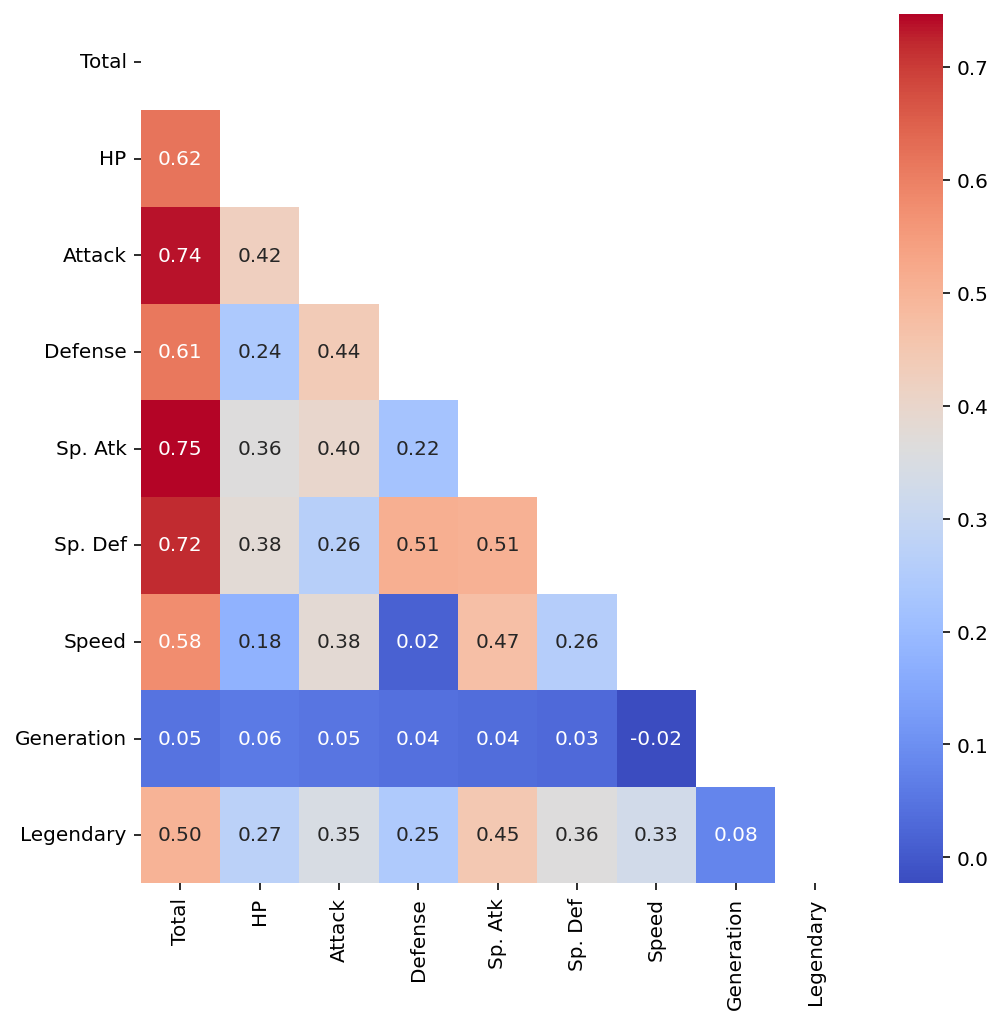

In [60]:
#한번 히트맵을 그려본다.

plt.figure(figsize=(8,8))
corr_df = pokemon[['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']].corr()

mask = np.triu(np.ones_like(corr_df))

sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)

---
### 여기서부터 머신러닝 !

## 5. Baseline 모델 만들기

In [61]:
#전처리한 데이터 말고 완전 기본 데이터로 한 번 만들어보자
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 1) 사용할 feature들 선택

In [62]:
#문자열 데이터를 그냥 제외해주자
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [63]:
#선택할 컬럼들만 따로 뺀다
features = ['Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
target = 'Legendary'

### 2) 독립변수, 종속변수 X, y를 나눠준다

In [64]:
# Q. 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장합니다.
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [65]:
# Q. 'target' 컬럼의 데이터를 변수 'y'에 저장합니다.
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

### 3) train, validation을 나눠준다 (모델 학습 & 평가)

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=15)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((640, 8), (640,), (160, 8), (160,))

### 4) 분류모델 (Classification) 불러오기 (여기서는 Decision Tree 사용)

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
#random_state는 모델의 랜덤성을 제어합니다. 
#어떤 값을 넣어도 상관없지만, 실험 단계에서는 랜덤성에 의해 학습 결과가 차이 나는 것을 방지하기 위해 하나의 값으로 고정해서 실험하는 것이 좋습니다.
model = DecisionTreeClassifier(random_state=25)

In [69]:
model.fit(X_train, y_train)
pred = model.predict(X_val)

### 5) 모델이 X_test를 입력받고 예측한 pred 값 & 실제 정답 y_val 과 비슷한지 채점

In [70]:
#(실제값, 예측값)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, pred)

array([[144,   3],
       [  5,   8]])

* [TN, FP  
   FN, TP]
* positive : 전설의 포켓몬, negative : 일반포켓몬을 나타낸다
    - TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.
    - FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.
    - FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.
    - TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.

* 전체 160 학습데이터 중에서 FP, FN이 8개뿐이니 나쁘지 않다

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



* recall = TP / (FN + TP)
* recall 이 낮다는 건, FN (가짜일반 : 전설의 포켓몬인데 일반포켓몬이라고 판단하는 경우)가 많은 것임

## 6. Feature Engineering 데이터로 다시 모델링하기

### 1) 사용할 feature들 선택

In [72]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Name_count',
       'Long_name', 'Name_nospace', 'Name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Fire', 'Water', 'Ground', 'Ghost', 'Psychic', 'Poison', 'Dragon',
       'Ice', 'Flying', 'Fairy', 'Fighting', 'Normal', 'Rock', 'Electric',
       'Dark', 'Steel', 'Bug', 'Grass'],
      dtype='object')


* 우리가 앞에서 전처리를 잘 해줘서, 컬럼이 기존 13개에서 45개로 늘어났다. 필요없는 열은 제거해준다

### 💡 여기서도, 모든 피처를 컬럼으로 일일이 쓰지 않고, 필요없는 것만 drop하고 나머지 컬럼만 지정해주는 방식을 시도했다

In [78]:
#독립변수(X)로 넣을 컬럼들만 추린다.
features = pokemon.drop(columns=['#', 'Name', 'Type 1', 'Type 2', 'Name_nospace', 'Name_isalpha', 'Legendary']).columns
len(features)

#노드에서 주어진 코드는 아래와 같은데, 굳이 다 짚어주지 않아도 되지 않을까나
# features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
#             'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
#             'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
#             'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

# len(features)

38

In [79]:
target = 'Legendary'

### 2) 독립변수, 종속변수 X, y를 나눠준다

In [80]:
#한번에 표현하기

X = pokemon[features]
y = pokemon[target]

print(X.shape, y.shape)
display(X.head())
display(y.head())

(800, 38) (800,)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Name_count,Long_name,...,Flying,Fairy,Fighting,Normal,Rock,Electric,Dark,Steel,Bug,Grass
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,False,False,True
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,False,False,True
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,False,False,True
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,False,False,True
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

### 3) train, validation을 나눠준다 (모델 학습 & 평가)

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=15)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((640, 38), (640,), (160, 38), (160,))

### 4) 분류모델 (Classification) 불러오기 (여기서는 Decision Tree 사용)

In [83]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [84]:
model.fit(X_train, y_train)
pred = model.predict(X_val)

### 5) 모델이 X_test를 입력받고 예측한 pred 값 & 실제 정답 y_val 과 비슷한지 채점¶

In [85]:
confusion_matrix(y_val, pred)

array([[141,   6],
       [  1,  12]])

In [88]:
# accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, pred))

# precision
from sklearn.metrics import precision_score
print(precision_score(y_val, pred))

# recall
from sklearn.metrics import recall_score
print(recall_score(y_val, pred))

# f1 score
from sklearn.metrics import f1_score
print(f1_score(y_val, pred))

0.95625
0.6666666666666666
0.9230769230769231
0.7741935483870968


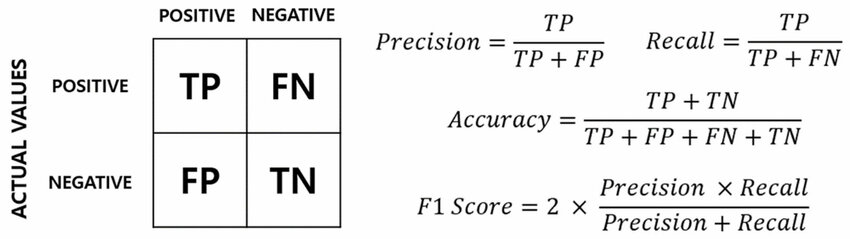  


- Accuracy : 모델이 정확하게 예측한 비율 
    - Accuracy = (TP + TN) / (TP+TN+FP+FN) 
    
- Precision(정밀도) : 모델이 양성으로 예측한 값 중, 실제 양성인 비율 (precision, recall은 역의 관계) 
    - Precision= TP / (TP+FP)  
    
- Recall(재현율) : 실제 양성 값 중, 모델이 양성으로 올바르게 예측한 비율
    - Recall = TP / (TP+FN)  
    
- F1 Score
    - F1-score=  2 × (Precision × Recall) / (Precision + Recall) 
  

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



---
# 💡 Project : 다른 머신러닝 모델로 성능 높이기
- classification 문제에 쓸 수 있는 머신러닝 모델에는 다음이 있다
    - DecisionTree
    - RandomForest : 여러개의 의사결정 트리를 앙상블 (결과를 결합해 성능향상/ 고차원 & 대용량 데이터에 적합)
    - Gradient Boosting : 약한 예측모델(의사결정트리)을 연속 학습하면서 오차 보강해 강한 모델을 만듦 (학습시간이 길다)
    - SVM (Support Vector Machine) : 데이터의 클래스를 분리하는 초평면을 찾는다
    - Logistic Regression : 경사하강법 등 최적화 알고리즘을 사용해 모델 학습
    - K-Nearest Neighbors (KNN) : 주어진 데이터포인트와 가장 가까운 이웃데이터 클래스 기준으로 분류 (간단, 유연)
    - Naive Bayes : 입력특성들 사이 독립 가정을 사용해 클래스를 예측 (텍스트 등 특성이 희소한 고차원데이터에 효과적)
    - Neural Networks : 입력층,은닉층,출력층으로 구성되며, 다중 퍼셉트론(MLP)은 분류문제에 사용, 복잡한 패턴 학습 가능

   
     
* 하이퍼파라미터까지 적용해줘서 모델별 성능을 비교해보도록 한다

In [104]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def print_evaluate(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)  # f1_score 함수 호출 후 반환값을 변수에 할당
    print('accuracy: ', accuracy)
    print('precision: ', precision)
    print('recall: ', recall)
    print('f1-score: ', f1)  # 변수를 출력
    
def evaluate(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)  # 변수 이름 변경
    return accuracy, precision, recall, f1

## 1) Decision Tree

In [125]:
#하이퍼파라미터 적용 전

model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)
pred = model.predict(X_val)

print_evaluate(y_val, pred)
result_df = pd.DataFrame(data=[["Decision Tree(Base)",*evaluate(y_val, pred)]],
                          columns=['Model','accuracy','precision','recall','f1-score'])
result_df

accuracy:  0.95625
precision:  0.6666666666666666
recall:  0.9230769230769231
f1-score:  0.7741935483870968


,Model,accuracy,precision,recall,f1-score
0,Decision Tree(Base),0.95625,0.666667,0.923077,0.774194


In [126]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=4, 
    min_samples_split=5,
    min_samples_leaf=2, 
    random_state=25)
 
model.fit(X_train, y_train)
pred = model.predict(X_val)
print_evaluate(y_val, pred)


result_df2 = pd.DataFrame(data=[["Decision Tree(Advanced)",*evaluate(y_val, pred)]],
                          columns=['Model','accuracy','precision','recall','f1-score'])

result_df = pd.concat([result_df, result_df2], ignore_index=True)
result_df

accuracy:  0.95625
precision:  0.65
recall:  1.0
f1-score:  0.787878787878788


,Model,accuracy,precision,recall,f1-score
0,Decision Tree(Base),0.95625,0.666667,0.923077,0.774194
1,Decision Tree(Advanced),0.95625,0.650000,1.000000,0.787879


## 2) Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=25)

model.fit(X_train, y_train)
pred = model.predict(X_val)
print_evaluate(y_val, pred)


result_df2 = pd.DataFrame(data=[["Random Forest",*evaluate(y_val, pred)]],
                          columns=['Model','accuracy','precision','recall','f1-score'])

result_df = pd.concat([result_df, result_df2], ignore_index=True)
result_df

accuracy:  0.9625
precision:  0.7692307692307693
recall:  0.7692307692307693
f1-score:  0.7692307692307693


,Model,accuracy,precision,recall,f1-score
0,Decision Tree(Base),0.95625,0.666667,0.923077,0.774194
1,Decision Tree(Advanced),0.95625,0.650000,1.000000,0.787879
2,Random Forest,0.96250,0.769231,0.769231,0.769231


## 3) XGBoost

In [129]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
pred = model.predict(X_val)

print_evaluate(y_val, pred)


result_df2 = pd.DataFrame(data=[["XGBoost",*evaluate(y_val, pred)]],
                          columns=['Model','accuracy','precision','recall','f1-score'])

result_df = pd.concat([result_df, result_df2], ignore_index=True)
result_df

accuracy:  0.98125
precision:  0.8125
recall:  1.0
f1-score:  0.896551724137931


,Model,accuracy,precision,recall,f1-score
0,Decision Tree(Base),0.95625,0.666667,0.923077,0.774194
1,Decision Tree(Advanced),0.95625,0.650000,1.000000,0.787879
2,Random Forest,0.96250,0.769231,0.769231,0.769231
3,XGBoost,0.98125,0.812500,1.000000,0.896552


# 💡 비교

In [134]:
result_df.columns

Index(['accuracy', 'precision', 'recall', 'f1-score'], dtype='object')

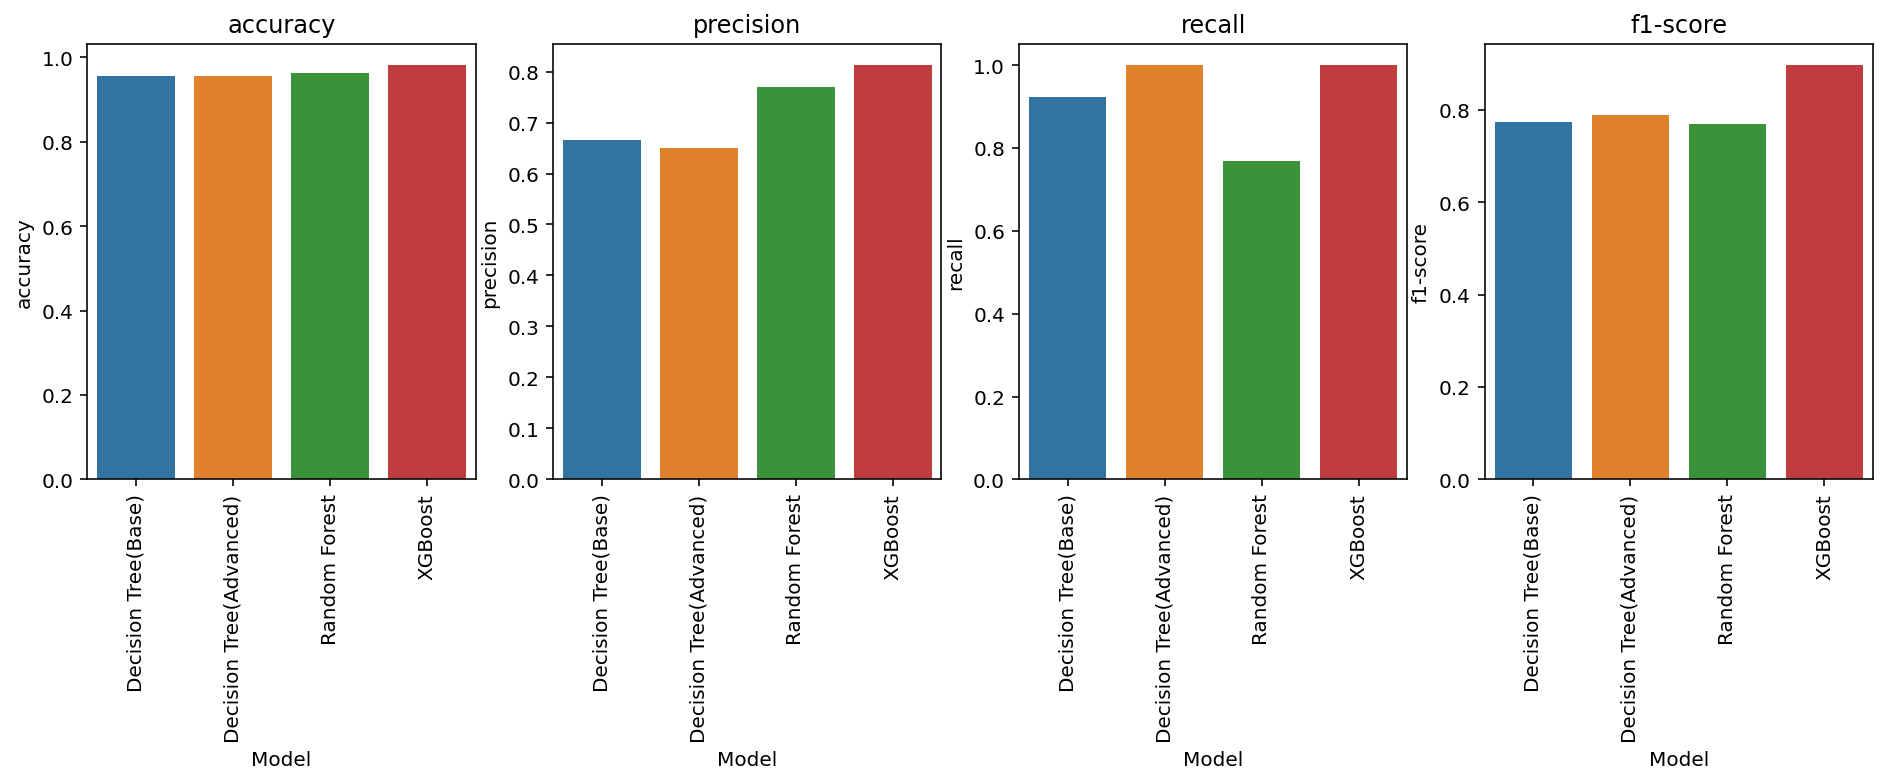

In [148]:
#for문을 통해 각 모델별 metrics를 비교할 수 있는 그래프를 시각화해본다

fcolumns = {'accuracy':0, 'precision':1, 'recall':2, 'f1-score':3}

#4개의 그래프를 만들어준다
fig, axes = plt.subplots(1,4,figsize=(16,4))

for metric,i in columns.items():
    sns.barplot(x=result_df.index, y=metric, data=result_df, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_title(metric)
plt.show()

# 🙂 회고
- 잘한 점 : 노드에 나와있는 코드를 스스로 이해하기 쉽고 간결하고 변형을 해서 진행했고, 내가 기존에 헷갈렸던 머신러닝 프로세스를 한 단계씩 밟아나가면서 절차를 확실히 익혔다. for문을 적극 활용하였으며, corr, barplot등 시각화를 통해 분석 결과를 보기 쉽게 출력하였다. 특정 단어가 들어가있는 이름을 분석할 때, 위에서 확인했던 '#'값을 활용하여 좀 더 창의적으로 문제를 해결하려고 시도했다. 그리고 실제로 노가다로 열을 지정했던 노드의 코드에 비해 더 정확한 값을 출력해냈다!! 


- 부족한 점 : 하이퍼파라미터와 교차검증에 대한 개념을 좀 더 익혀야겠다. 하이퍼파라미터는 best_params를 통해 최적 파라미터 찾는 법을 연습해야할 거 같고, 교차검증은 train_test_split으로 validation을 통해 모델을 검증하는 거 외에도 한 번 더 Kfold로 나눠서 다시 진행을 하는건지 조금 헷갈린다.
    
    
- 제대로 알게된 점 : Regression(회귀), Classification(분류) 모델은 각각 다른 평가지표를 사용한다. 여기서 확실히 짚고 넘어가자. 회귀문제에서는 연속형 target 변수의 값을 예측하므로, 오차의 크기를 측정하는 지표가 중요하다. 하지만, 분류문제에서는 Class Label을 예측하므로, 분류의 정확성과 관련된 지표가 중요하다는 점!   


    - Regression (회귀)
        - MAE, MSE, RMSE, RMSLE, R2
    - Classification (분류)
        - Accuracy, Precision, Recall, F1, ROC-AUC

- 느낀 점 : 캐글 필사랑 코세라 강의수강을 통해 배운 개념들과 코드들도 프로젝트에 적용해보면서 더 개념이 명확해지는 느낌이 든다. 역시 이론보다는 실전이지만, 실전과 이론은 병행돼야 더 잘 이해가 된다. 머릿속에 들어오는 게 많아서, 그걸 좀 체계적으로 정리하고 싶었는데, 프로젝트를 하면서 정리할 수 있는 시간을 가질 수 있어서 좋다. 그리고 무엇보다도 처음부터 끝까지 내 손으로 Raw 데이터를 예쁘게 시각화하고 분석하는 게 기분이 좋다! EDA를 할 때는 열이 너무 많으면 좀 압도당하는 기분이겠으나, 이 데이터셋에서는 모든 열을 거쳐서 하나하나 분석하는 과정이 재미있게 느껴졌다.